In [ ]:
# https://www.kaggle.com/poiupoiu/how-to-use-sarimax
# acf, pacf

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAGothic')
import numpy as np
import statsmodels.api as sm

In [2]:
df = pd.read_csv("/users/akuppam/documents/Hprog/Py/rnb1015_2.csv")
df = df.loc[(df['region'] == 'UK') & (df['marketing'] == 'NotPaid')]
df = df[~(df['nb'] < 0)]
df.describe()
df.index = pd.to_datetime(df.date)
cols = ["nb"]
y = df[cols]
y.head()

,nb
date,
2016-01-01,403
2016-01-02,451
2016-01-03,682
2016-01-04,672
2016-01-05,705


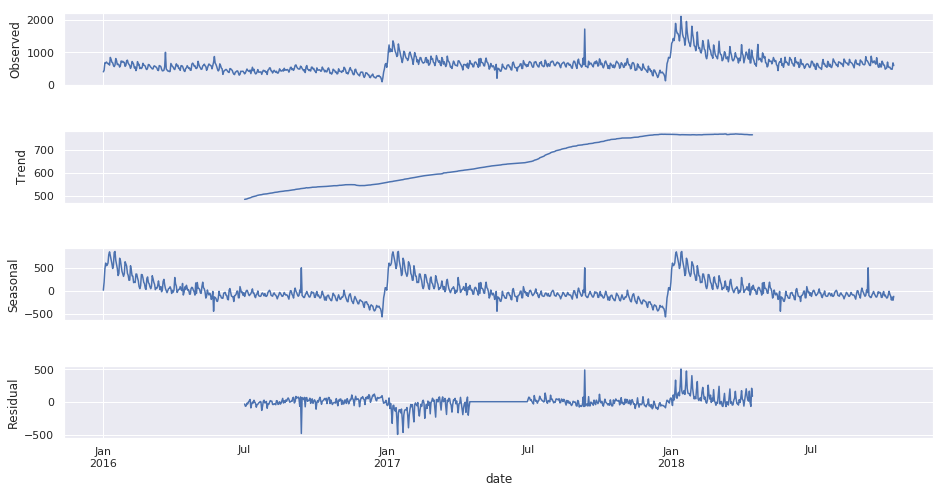

In [3]:
res = sm.tsa.seasonal_decompose(y.nb.dropna(),freq=365)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.show()

In [15]:
#ADF-test(Original-time-series)
res = sm.tsa.adfuller(y['nb'].dropna(), regression='ct')
print('p-value:{}'.format(res[1]))

p-value:0.010497032746570722


In [16]:
#ADF-test(differenced-time-series)
res = sm.tsa.adfuller(y['nb'].diff().dropna(), regression='c')
print('p-value:{}'.format(res[1]))

p-value:4.786176696016455e-11


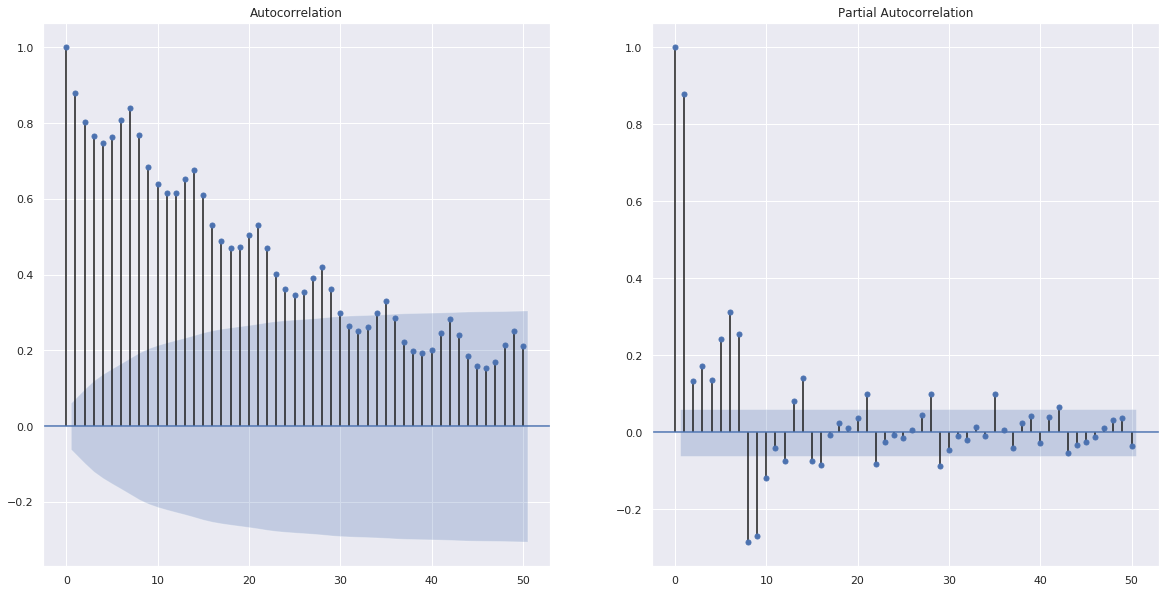

In [8]:
# acf, pacf
fig,ax = plt.subplots(1,2,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(y['nb'].dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(y['nb'].dropna(), lags=50, ax=ax[1])
plt.show()

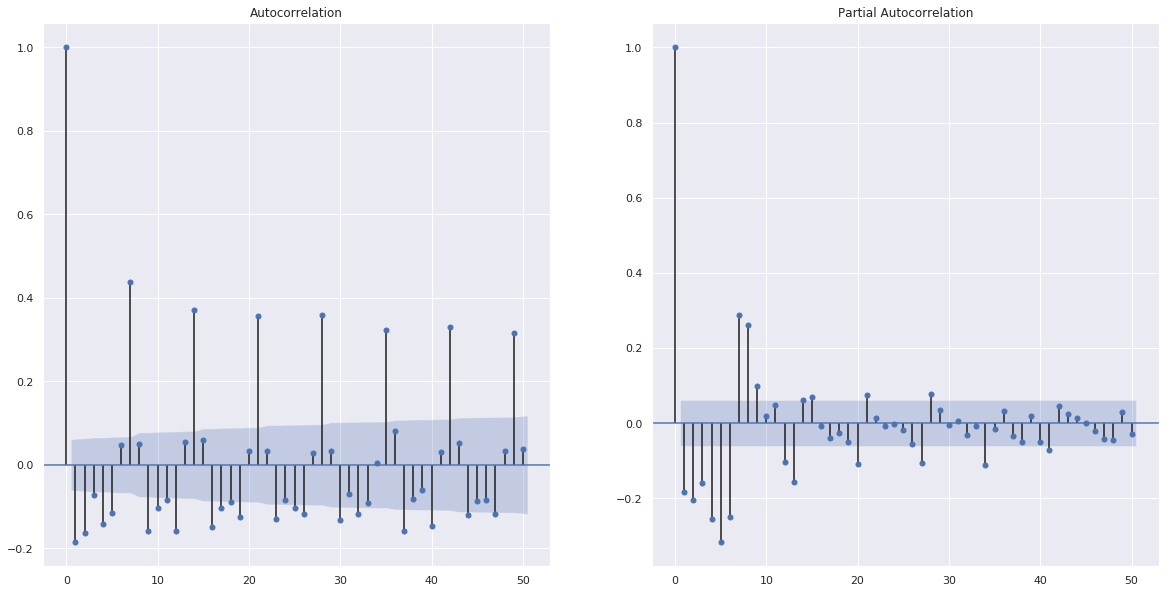

In [9]:
# acf, pacf w/ diff()
fig,ax = plt.subplots(1,2,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(y['nb'].diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(y['nb'].diff().dropna(), lags=50, ax=ax[1])
plt.show()

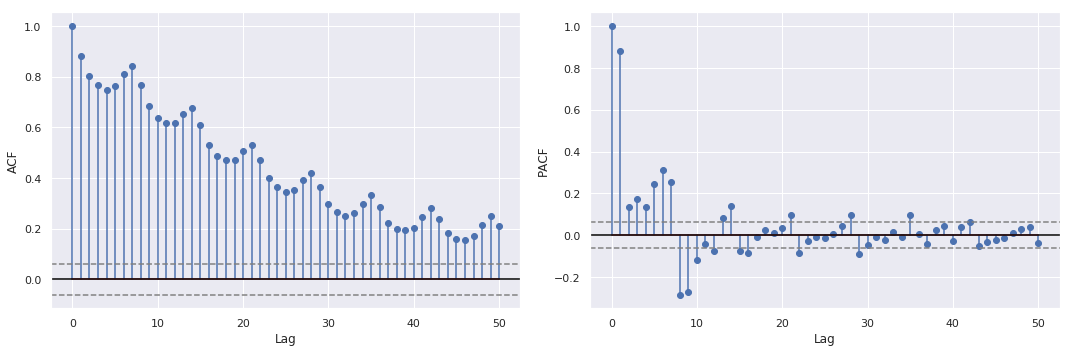

In [30]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(y['nb'], nlags=50)
lag_pacf = pacf(y['nb'], nlags=50)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(y['nb'])),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(y['nb'])),linestyle='--', color='gray')
plt.xlabel('Lag')
plt.ylabel('ACF')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(y['nb'])),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(y['nb'])),linestyle='--', color='gray')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.tight_layout()

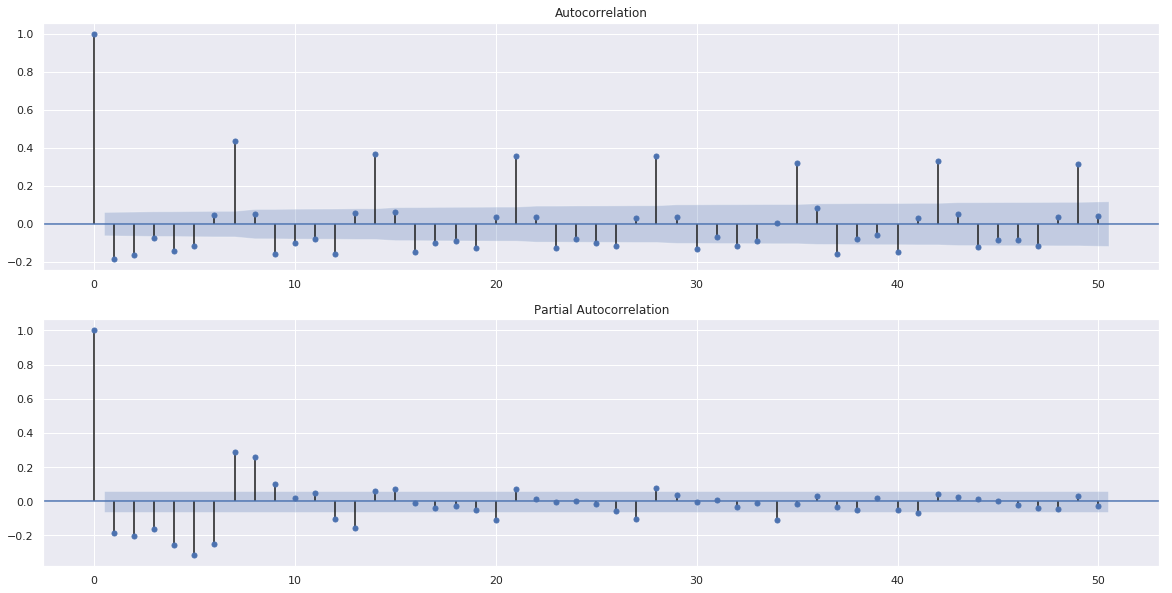

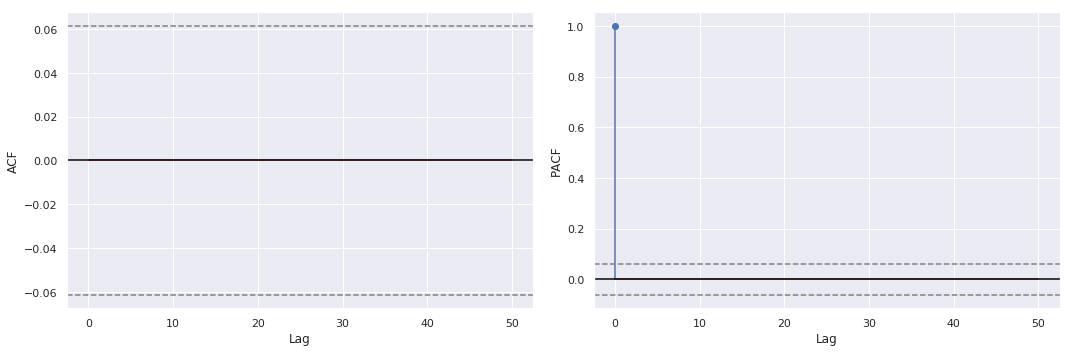

In [7]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(y['nb'].diff(), nlags=50)
lag_pacf = pacf(y['nb'].diff(), nlags=50)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(y['nb'])),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(y['nb'])),linestyle='--', color='gray')
plt.xlabel('Lag')
plt.ylabel('ACF')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(y['nb'])),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(y['nb'])),linestyle='--', color='gray')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.tight_layout()

In [26]:
resDiff = sm.tsa.arma_order_select_ic(y['nb'], max_ar=7, max_ma=7, ic='aic', trend='c')
print('ARMA(p,q) =', resDiff['aic_min_order'],'is the best.')

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARMA(p,q) = (7, 7) is the best.


In [33]:
resDiff1 = sm.tsa.arma_order_select_ic(y['nb'], max_ar=12, max_ma=12, ic='aic')
print('ARMA(p,q) =', resDiff1['aic_min_order'],'is the best.')

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anacon

ARMA(p,q) = (12, 9) is the best.


/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
resDiff2 = sm.tsa.arma_order_select_ic(y['nb'].diff(), max_ar=12, max_ma=12, ic='aic')
print('ARMA(p,q) =', resDiff2['aic_min_order'],'is the best.')

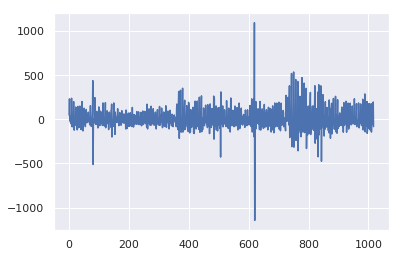

In [34]:
y_diff = y['nb'].diff(periods=1).values[1:]
plt.plot(y_diff)

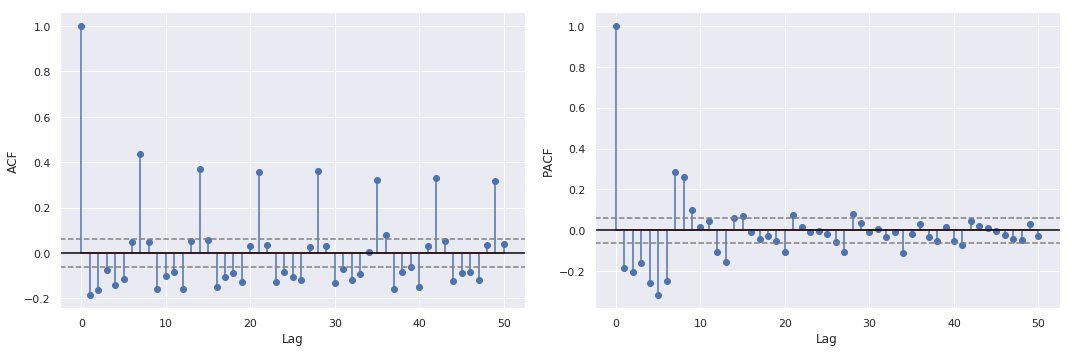

In [35]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(y_diff, nlags=50)
lag_pacf = pacf(y_diff, nlags=50)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.stem(lag_acf)
plt.axhline(y=0,linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(y['nb'])),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(y['nb'])),linestyle='--', color='gray')
plt.xlabel('Lag')
plt.ylabel('ACF')

plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='-', color='black')
plt.axhline(y=-1.96/np.sqrt(len(y['nb'])),linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(y['nb'])),linestyle='--', color='gray')
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.tight_layout()

In [38]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

date_today = 
ndays = 
df = pd.DataFrame({'date': [date_today + timedelta(days=x) for x in range(ndays)]})
df = df.set_index('date')

SyntaxError: invalid syntax (<ipython-input-38-70a0658a904d>, line 5)

In [37]:
df.head()

,test
date,
2018-11-12 15:38:11.100871,-0.103665
2018-11-13 15:38:11.100871,-1.383036
2018-11-14 15:38:11.100871,-0.536534
2018-11-15 15:38:11.100871,-0.130116
2018-11-16 15:38:11.100871,0.562508


In [39]:
df = pd.DataFrame(np.random.randint(0,30,size=10),
                  columns=["Random"],
                  index=pd.date_range("20180101", periods=10))

In [40]:
df.head()

,Random
2018-01-01,0
2018-01-02,1
2018-01-03,13
2018-01-04,12
2018-01-05,15


p-value:0.010497032746570722
p-value:4.786176696016455e-11


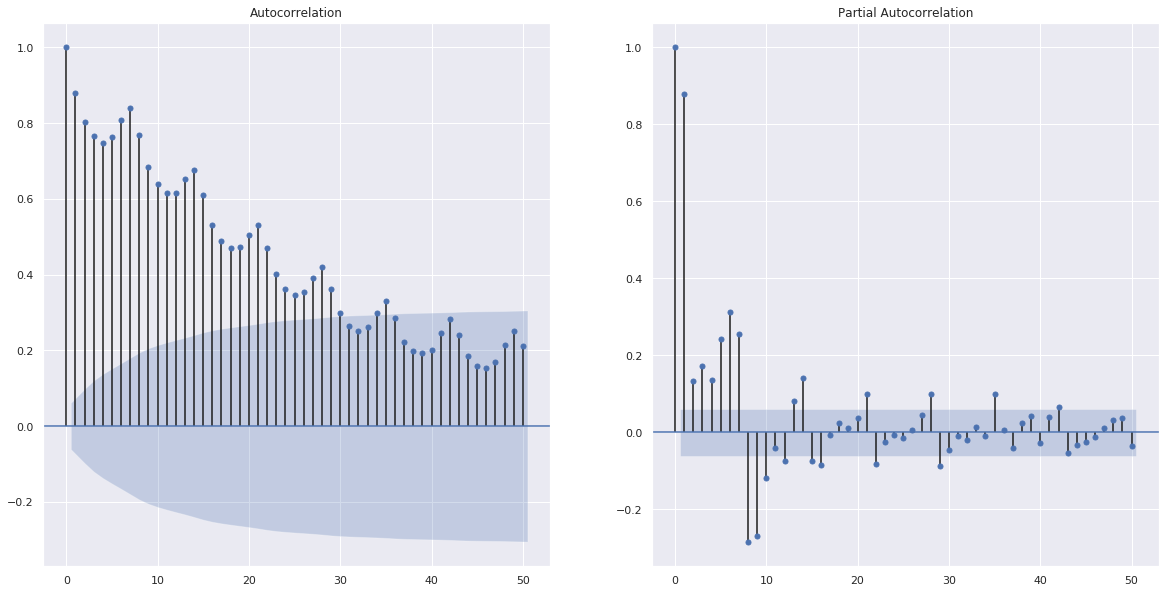

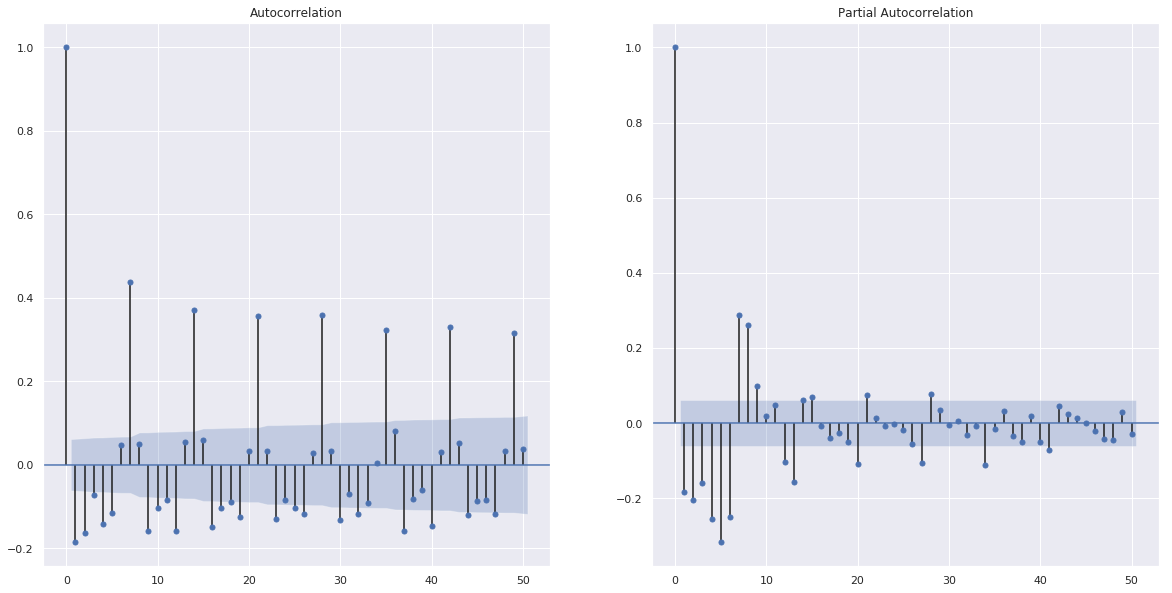

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAGothic')
import numpy as np
import statsmodels.api as sm

df = pd.read_csv("/users/akuppam/documents/Hprog/Py/rnb1015_2.csv")
df = df.loc[(df['region'] == 'UK') & (df['marketing'] == 'NotPaid')]
df = df[~(df['nb'] < 0)]
df.describe()
df.index = pd.to_datetime(df.date)
cols = ["nb"]
y = df[cols]
y.head()

# Ho - unit root	null / unit root / diff of 1
# Ha - no unit root	alt / no unit root / no diff
# p > 0.05	cannot reject there is a unit root (Ho)			Ho holds / diff(1)
# p < 0.05	reject Ho			Ho does not hold / no diff

#ADF-test(Original-time-series)
res = sm.tsa.adfuller(y['nb'].dropna(), regression='ct')
print('p-value:{}'.format(res[1]))

#ADF-test(differenced-time-series)
res = sm.tsa.adfuller(y['nb'].diff().dropna(), regression='ct')
print('p-value:{}'.format(res[1]))

# acf, pacf
fig,ax = plt.subplots(1,2,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(y['nb'].dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(y['nb'].dropna(), lags=50, ax=ax[1])
fig.savefig('UK_NotPaid.jpg')
plt.show()

# acf, pacf w/ diff()
fig,ax = plt.subplots(1,2,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(y['nb'].diff().dropna(), lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(y['nb'].diff().dropna(), lags=50, ax=ax[1])
plt.show()

# diff = 0
resDiff0 = sm.tsa.arma_order_select_ic(y['nb'], max_ar=12, max_ma=12, ic='aic')
print('ARMA(p,q) =', resDiff0['aic_min_order'],'is the best.')

# diff = 1
resDiff1 = sm.tsa.arma_order_select_ic(y['nb'].diff(), max_ar=12, max_ma=12, ic='aic')
print('ARMA(p,q) =', resDiff1['aic_min_order'],'is the best.')